# TP 2 : Computer Vision

## Part 1 : segmentation

In this part of the TP, we are going to implement two approaches to image segmentation :

- algorithm of Otsu (histogram-based segmentation)
- a simple region-growing based algorithm

First, let us load some packages and define some helper functions (as in the previous TP)

C:\Users\槐序有陆\AppData\Local\Temp\ipykernel_20704\1019472148.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_color = imageio.imread(file_name)


(800, 586)

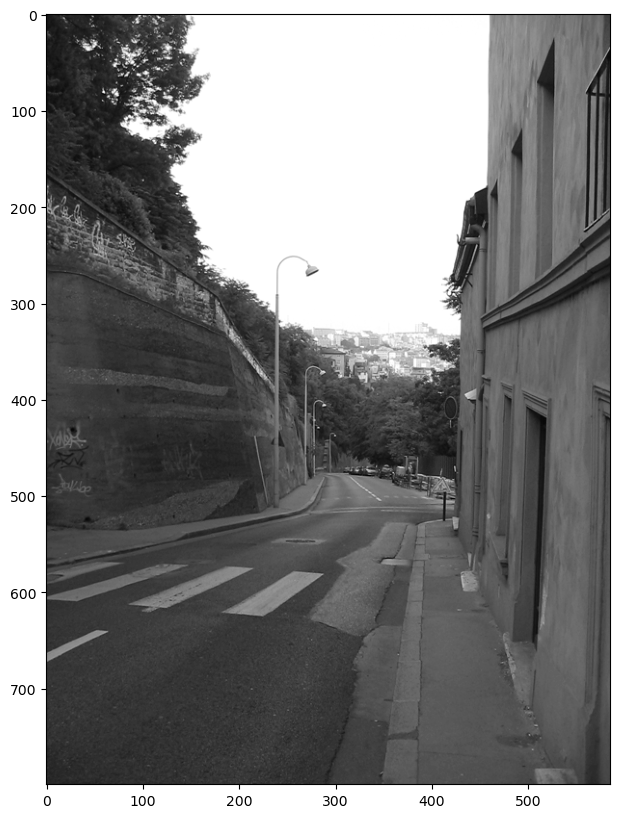

In [78]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

is_colab = False

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    plt.figure(figsize=(10, 10))
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

file_dir = 'images/'
file_name = 'crossing'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/crossing.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

## Otsu's algorithm

Otsu's method is based on finding a threshold to split the image into two separate segments, based simply on their grey-level values. Since the maximum number of grey-levels is finite (and small: 256), we can use an exhaustive search.

The grey-level threshold is the one that minimises the following criterion :

$argmin_{\tau} \: \omega_0(\tau)\sigma_0(\tau) + \omega_1(\tau)\sigma_1(t)$

where

- $\sigma_0(\tau)$ and $\sigma_1(\tau)$ are the variances of the pixels in the first and second regions
- $\omega_0(\tau)$ and $\omega_1(\tau)$ are weights of the first and second regions

and 

- $\omega_0(\tau) = \sum_{p \in \Omega} \mathbb{1}_{\tau}(I(p)), \qquad$
- $\omega_1(\tau) = \sum_{p \in \Omega} 1-\mathbb{1}_{\tau}(I(p))$

and 

$\mathbb{1}_{\tau}(I(p)) =\begin{cases}
        1 \; \text{if} \: I(p)<=\tau\\
        0 \; \text{otherwise}
\end{cases}$

Implement this algorithm in a function called ``segmentation_otsu``. Note : only analyse thresholds which produce two distinct regions. Furthemore, remember that the image is normalised between 0 and 1, with 256 discrete values. Choose the threshold values accordingly.

In [86]:
def segmentation_otsu(img):
    # TO FILL IN
    # RETURN BOTH THE SEGMENTED IMAGE AND THE THRESHOLD WHICH YOU HAVE FOUND
    # thresholds = np.uint8(list(range(256))) / 255
    img_flattened = img.flatten()
    thresholds = np.unique(np.uint8(255.0 * img_flattened)) / 255
    criterion_min = np.inf
    tau_out = 0
    for thres in thresholds:
        first_region = (img_flattened <= thres)
        second_region = np.invert(first_region)
        criterion = np.var(img_flattened[first_region]) * first_region.sum() + \
                    np.var(img_flattened[second_region]) * second_region.sum()
        if criterion < criterion_min:
            criterion_min = criterion
            tau_out = thres
            img_out = (img_flattened * second_region).reshape(img.shape)
    return img_out, tau_out

Carry out the segmentation on the input image and display the result

c:\Users\yunhao\anaconda3\envs\computer-vision\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\yunhao\anaconda3\envs\computer-vision\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\yunhao\anaconda3\envs\computer-vision\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


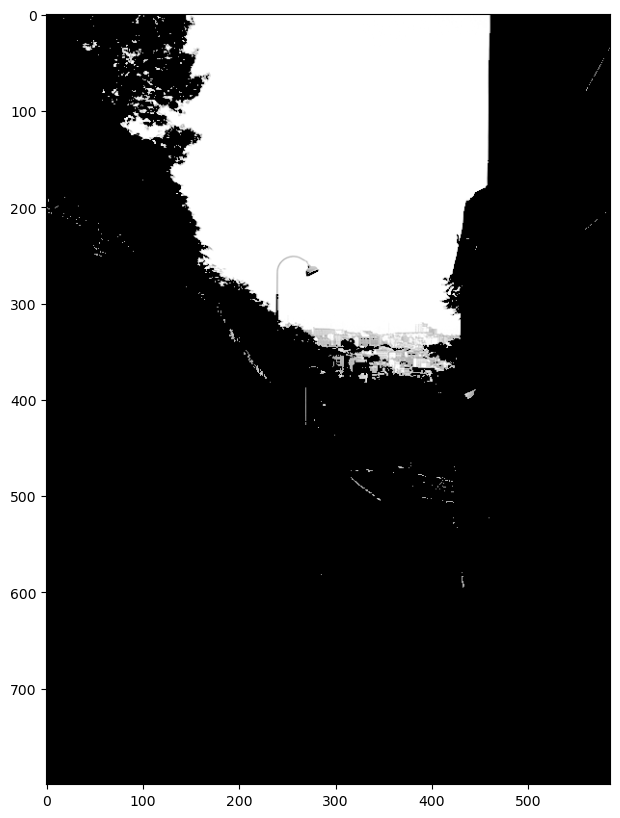

In [87]:
img_out_otsu, tau = segmentation_otsu(img_gray)
display_image(img_out_otsu)
write_image(img_out_otsu,file_name+'_segmentation_otsu.png')

In [88]:
tau

0.6392156862745098

__Question 1.1__ What problem can you see with the segmentation result ? What technique(s) (seen in the lesson) could you use to clean the result up ? 

__Answer__: There are some small white holes in black part. Also the street lamp is not smoothly connected to black part. We can use `morphological techniques` to clean up.

Carry this out on the output image, and imwrite the result. You can find the necessary function(s) in the following package :

skimage.morphology

Choose the neighbourhood parameter of the functions to obtain the best results.

__Question 1.2__ In which order did you carry out the operations (you can test the different possibilities) ? Explain why you think this order is best.

__Answer__: First, perform an `opening` operation, to remove small white holes; then use a `closing` operation to fill in the black holes in white region.

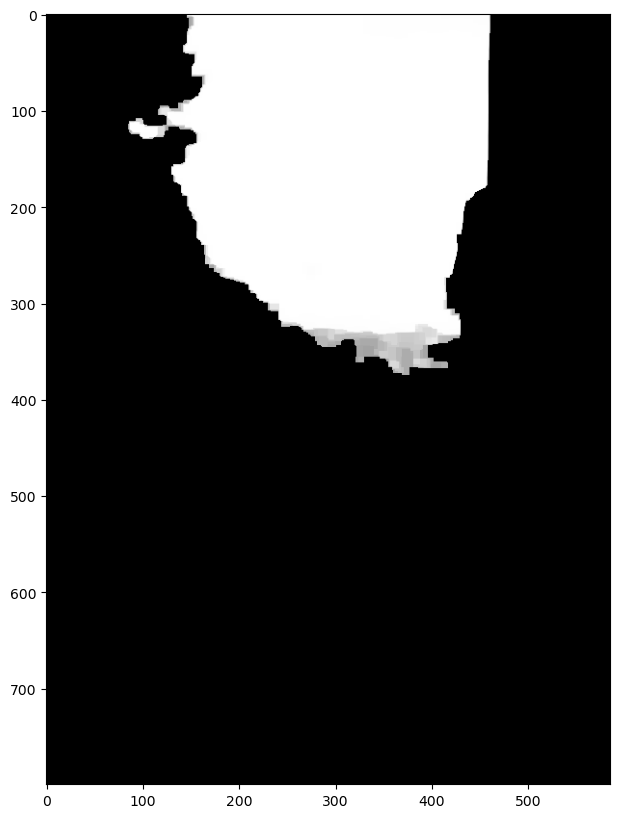

In [118]:
# FILL IN HERE
import skimage
struct_el_open = np.ones((6,6))
strcut_el_close = np.ones((9,9))
img_out_otsu_cleaned = skimage.morphology.closing(skimage.morphology.opening(img_out_otsu,struct_el_open),strcut_el_close) # FILL IN HERE
# img_out_otsu_cleaned = skimage.morphology.opening(skimage.morphology.closing(img_out_otsu,strcut_el_close),struct_el_open) # FILL IN HERE

display_image(img_out_otsu_cleaned)
write_image(img_out_otsu_cleaned,file_name+'_segmentation_otsu_cleaned_1.png')

Let's change the image, and carry out the segmentation again.

C:\Users\槐序有陆\AppData\Local\Temp\ipykernel_20704\1019472148.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_color = imageio.imread(file_name)


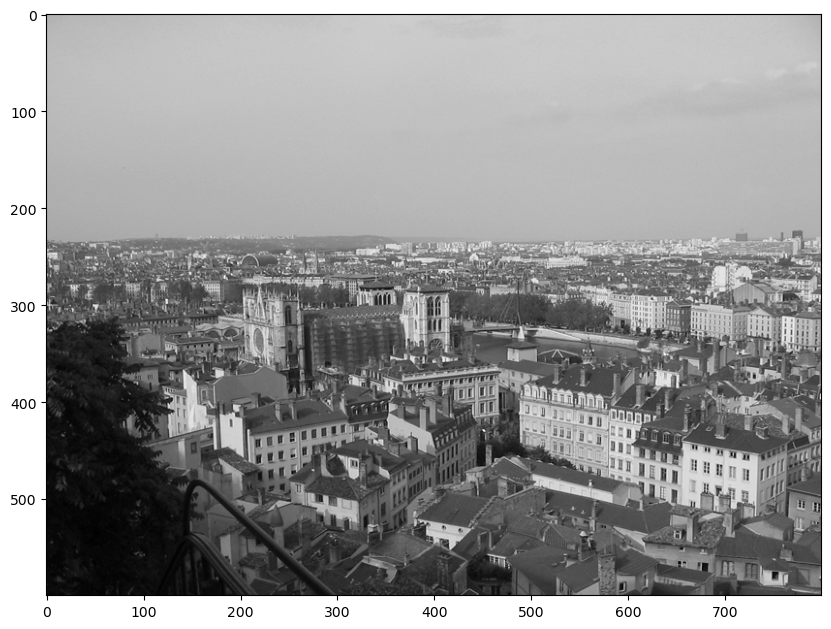

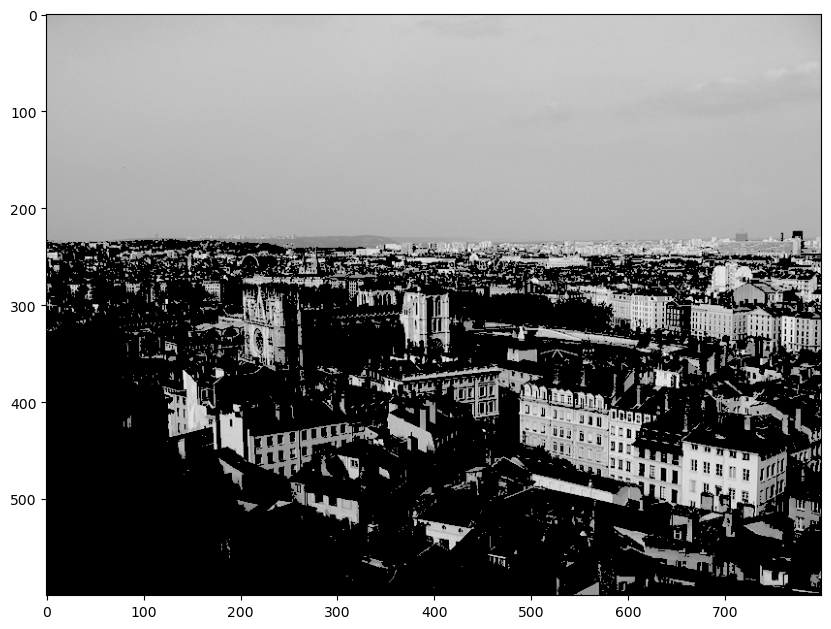

In [119]:
file_name = 'town'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/town.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

img_out_otsu,tau = segmentation_otsu(img_gray)
display_image(img_out_otsu)
write_image(img_out_otsu,file_name+'_segmentation_otsu.png')

As we can see, there is no notion of connectivity in the algorithm of Otsu (two regions far away can be in the same segment). For such a notion, we turn to region merging.

## Region merging

The region merging algorithm is quite simple : we start with a small region, and add pixels progressively to the region, according to a criterion. We choose the following criterion :

- $I(p)$ is added to the region if the absolute difference between the pixel value and the region's average value is less than a threshold value (which you must set).

First, create a function called ``initialize_segmentation`` which initialises the segmentation with a small circular region centred on a given seed point (the seed point is an input). For this, the following function :

- scipy.ndimage.morphology.distance_transform_edt

can be useful.

In [148]:
from scipy.ndimage import distance_transform_edt

def initialize_segmentation(seed_pt, img_shape):
    # FILL IN HERE
    radius = 6
    img = np.ones(img_shape)
    img[seed_pt[0], seed_pt[1]] = 0
    seg_init = (distance_transform_edt(img) < radius)
    return seg_init

Now, create a function called ``segmentation_region_growing`` which carries out the region growing algorithm, with the criterion above, and which uses the ``initialize_segmentation`` function. Again, the functions from ``scipy.ndimage.morphology`` can be useful here.

You will have to choose a neighbourhood that indicates which neighbouring pixels we want to try and include in the region. Use the following neighbourhood: $$ \begin{pmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 0\end{pmatrix}$$

In [165]:
def segmentation_region_growing(img,seed_pt,tau):

    # FILL IN HERE
    # RETURN BOTH THE SEGMENTED IMAGE AND THE INITIALISATION WHICH YOU FOUND
    def valide_pixel(img_shape, x, y):
        if x < 0 or y < 0:
            return False
        if x >= img_shape[0] or y >= img_shape[1]:
            return False
        return True

    seg_init = initialize_segmentation(seed_pt, img.shape)
    seg_n = seg_init[:]
    region = set(zip(*np.where(seg_init == 1)))
    newly_added = region.copy()
    old_size = -1

    while (old_size != len(region)):
        mu = sum([img[i,j] for (i,j) in region]) / len(region)
        old_size = len(region)
        wait_to_add = set()
        for (x,y) in newly_added:
            for (i,j) in [(x, y+1), (x, y-1), (x+1,y), (x-1,y)]:
                if valide_pixel(img.shape, i, j) and (i,j) not in region:
                    if abs(img[i,j] - mu) < tau:
                        seg_n[i,j] = 1
                        wait_to_add.add((i,j))
        newly_added = wait_to_add.copy()
        region.update(wait_to_add)
                

    return seg_n, seg_init

Carry out the segmentation on the input image with the seed point and threshold specified in the following code :

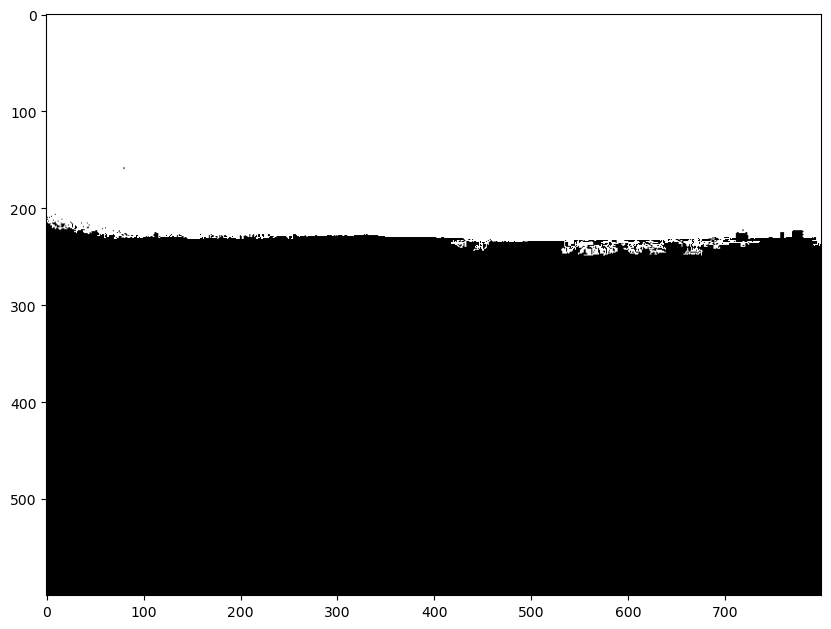

In [166]:
seed_pt = np.asarray([130,350])
tau = 20.0 * (1.0/256.0)
img_out_region_growing, seg_init = segmentation_region_growing(img_gray, seed_pt, tau)
display_image(img_out_region_growing)
write_image(seg_init,file_name+'_segmentation_region_growing_init.png')
write_image(img_out_region_growing,file_name+'_segmentation_region_growing.png')

__Question 1.3__ What final problem, especially concering the boundary between the regions, can you see ? What method could be used instead of region growing, could solve this problem ?

__Answer__: The boundary is not smooth. We could employ the active contours (snakes model) to get a smooth boundary.